In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

In [3]:
mnist_data = pd.read_csv('./datasets/train.csv')

In [4]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_data.shape

(42000, 785)

In [8]:
sorted(mnist_data['label'].unique())

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

In [9]:
mnist_features = mnist_data.drop(columns=['label'])
mnist_labels = mnist_data['label']

In [10]:
def display_image(index: int) -> None:
    """
    Display an MNIST digit image by index.

    Parameters
    ----------
    index : int
        Index of the MNIST sample to display.
    """

    if index < 0 or index >= len(mnist_features):
        raise IndexError(f"Index {index} is out of range (0–{len(mnist_features)-1}).")
    label = mnist_labels[index]
    img = mnist_features.loc[index].values.reshape(28, 28)


    fig, ax = plt.subplots(figsize=(4, 4))
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Digit: {label}", fontsize=14)
    ax.axis("off")

    plt.tight_layout()
    plt.show()



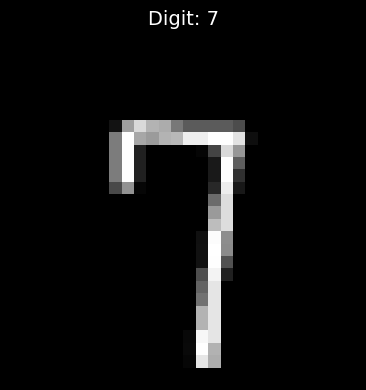

In [13]:
display_image(50)

In [14]:
k_means_model = KMeans(n_clusters=10, max_iter=1000, random_state=42, n_init='auto').fit(mnist_features)

In [15]:
k_means_centroids = k_means_model.cluster_centers_

In [16]:
k_means_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 784))

In [17]:
def plot_centroids(centroids, img_shape=(28, 28), cols=5):
    """
    Visualize KMeans centroids as image grids.

    Parameters
    ----------
    centroids : np.ndarray
        Array of shape (n_clusters, n_features) containing the flattened centroid
        vectors learned by a clustering algorithm (e.g., KMeans on MNIST).
        Each centroid is expected to represent an image after reshaping.
    img_shape : tuple of int, default=(28, 28)
        Target shape used to reshape each centroid vector into an image.
        For MNIST-like data this is (28, 28).
    cols : int, default=5
        Number of columns in the visualization grid. The number of rows is
        computed automatically based on the number of centroids.

    Notes
    -----
    - All axes are hidden for a cleaner visualization.
    - The function automatically adjusts the number of rows to fit all centroids.
    - Extra empty subplots remain blank if centroids do not fill the grid exactly.

    Examples
    --------
    >>> from sklearn.cluster import KMeans
    >>> model = KMeans(n_clusters=10).fit(X)
    >>> plot_centroids(model.cluster_centers_)
    """
    n_centroids = len(centroids)
    rows = (n_centroids + cols - 1) // cols  # ceiling division

    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = np.array(axes).reshape(rows, cols)

    for i in range(rows * cols):
        ax = axes[i // cols, i % cols]
        ax.axis("off")

        if i < n_centroids:
            img = centroids[i].reshape(img_shape)
            ax.imshow(img, cmap="gray")
            ax.set_title(f"Centroid {i}", fontsize=12)

    plt.tight_layout()
    plt.show()

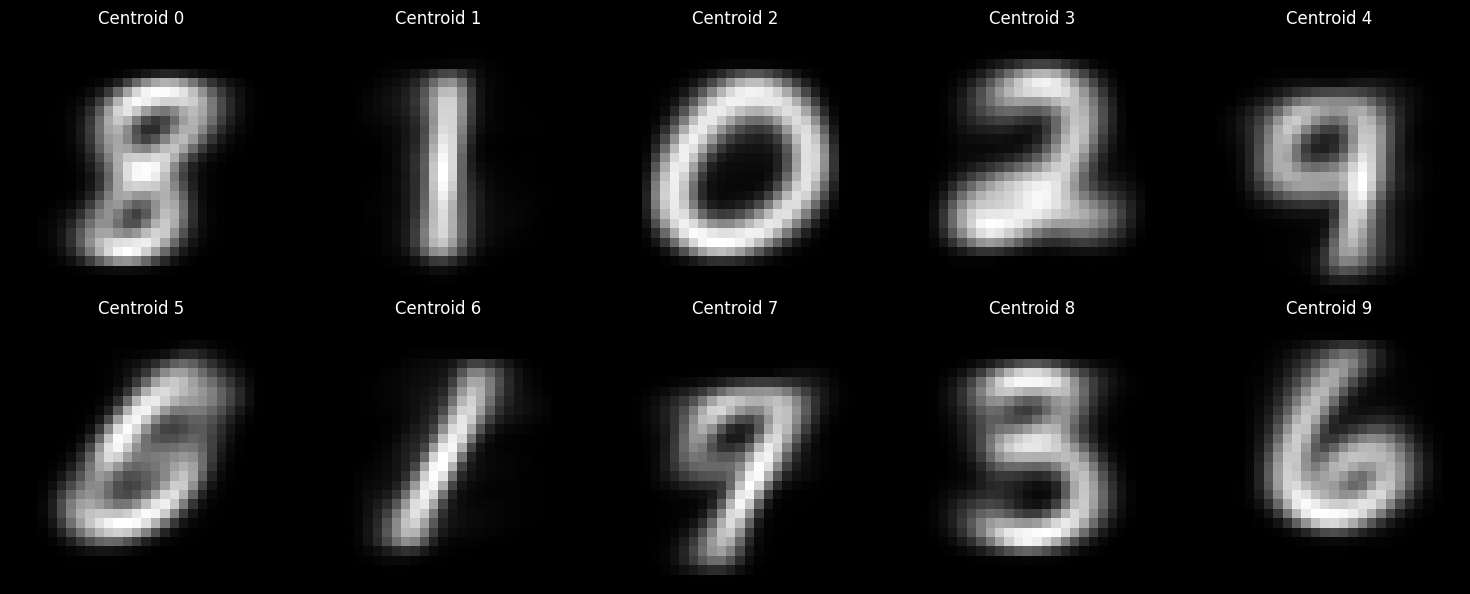

In [18]:
plot_centroids(k_means_centroids)

In [19]:
mnist_test = mnist_data.sample(10, replace=False)
mnist_test_features = mnist_test.drop(columns='label')
mnist_test_labels = mnist_test['label']

In [20]:
mnist_test_labels

2501     7
24082    1
30408    1
32294    3
6163     3
14603    7
32765    1
14981    7
41012    5
31418    4
Name: label, dtype: int64

In [21]:
mnist_test_labels = mnist_test_labels.values

In [22]:
mnist_test_labels

array([7, 1, 1, 3, 3, 7, 1, 7, 5, 4])

In [23]:
pred_clusters = k_means_model.predict(mnist_test_features)

In [25]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,7,4
1,1,6
2,1,6
3,3,8
4,3,0
5,7,7
6,1,1
7,7,7
8,5,6
9,4,4


In [26]:
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

In [27]:
minibatch_kmeans_centroids = minibatch_kmeans_model.cluster_centers_

minibatch_kmeans_centroids.shape

(10, 784)

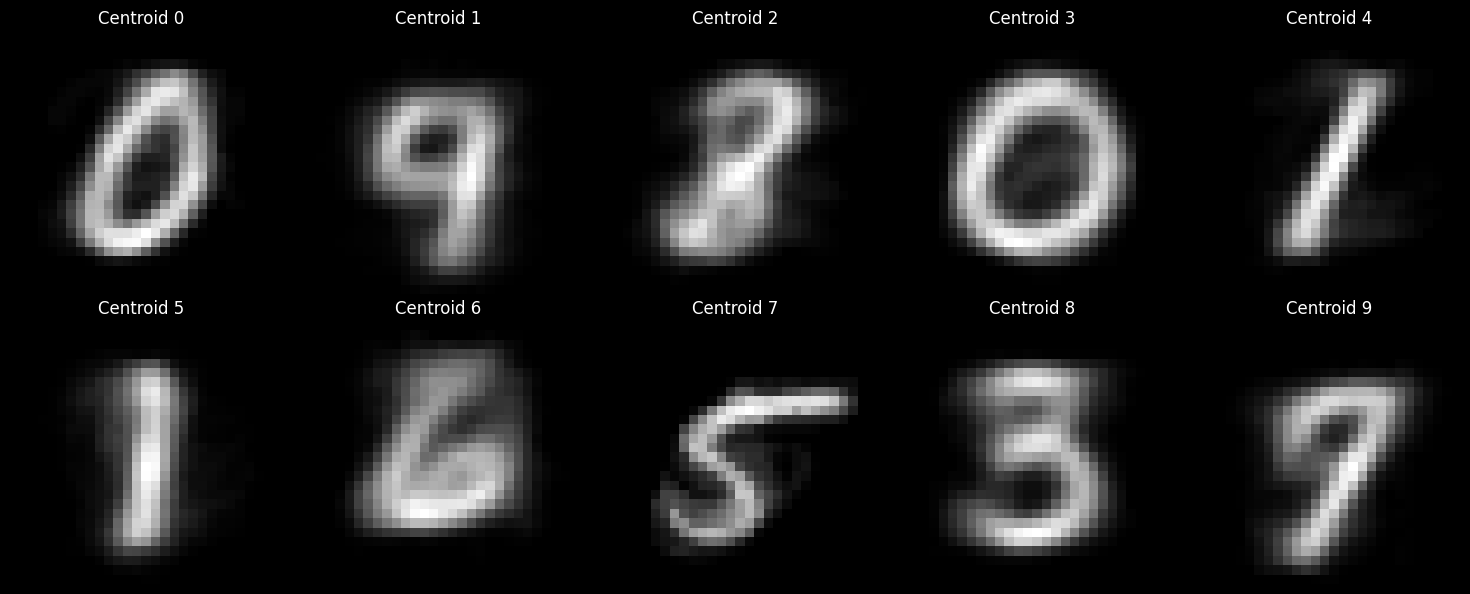

In [28]:
plot_centroids(minibatch_kmeans_centroids)

In [29]:
pred_clusters = minibatch_kmeans_model.predict(mnist_test_features)

In [30]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
                             'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,7,1
1,1,4
2,1,4
3,3,8
4,3,8
5,7,9
6,1,5
7,7,9
8,5,7
9,4,1


In [31]:
from __future__ import annotations

import time
from typing import Any, Dict

import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.base import ClusterMixin
import pandas as pd


def benchmark_kmeans_vs_minibatch(
    data: pd.DataFrame | np.ndarray,
    n_clusters: int = 3,
    batch_size: int = 256,
    n_init: str | int = "auto",
    max_iter: int = 300,
    random_state: int = 42,
    n_repeats: int = 5,
) -> Dict[str, Dict[str, Any]]:
    """
    Benchmark KMeans vs MiniBatchKMeans on a given dataset.

    Parameters
    ----------
    data : pandas.DataFrame or np.ndarray
        Input features of shape (n_samples, n_features).
    n_clusters : int, default=3
        Number of clusters for both algorithms.
    batch_size : int, default=256
        Mini-batch size for MiniBatchKMeans.
    n_init : {'auto', int}, default='auto'
        Number of initializations for centroid seeds.
    max_iter : int, default=300
        Maximum number of iterations for both algorithms.
    random_state : int, default=42
        Random seed for reproducibility.
    n_repeats : int, default=5
        How many times to repeat each fit for timing statistics.

    Returns
    -------
    results : dict
        Dictionary with timing and quality metrics for both algorithms.
        Example:
        {
            "kmeans": {
                "time_mean": ...,
                "time_std": ...,
                "inertia": ...,
                "silhouette": ...
            },
            "minibatch": {
                ...
            }
        }
    """
    # ensure numpy array
    if isinstance(data, pd.DataFrame):
        X = data.to_numpy()
    else:
        X = np.asarray(data)

    if X.ndim != 2:
        raise ValueError(f"`data` must be 2D (n_samples, n_features), got shape {X.shape}.")

    def _time_model(model: ClusterMixin, name: str) -> Dict[str, Any]:
        times: list[float] = []
        inertia_vals: list[float] = []
        silhouette_vals: list[float] = []

        for _ in range(n_repeats):
            start = time.perf_counter()
            model.fit(X)
            elapsed = time.perf_counter() - start
            times.append(elapsed)

            # inertia (if available)
            inertia = getattr(model, "inertia_", np.nan)
            inertia_vals.append(inertia)

            # silhouette (tylko jeśli mamy >= 2 klastry i brak klastrów jednoelementowych)
            labels = getattr(model, "labels_", None)
            if labels is not None:
                labels = np.asarray(labels)
                unique_labels = np.unique(labels)
                if 1 < len(unique_labels) < len(labels):
                    try:
                        sil = silhouette_score(X, labels)
                    except Exception:
                        sil = np.nan
                else:
                    sil = np.nan
            else:
                sil = np.nan
            silhouette_vals.append(sil)

        return {
            "time_mean": float(np.mean(times)),
            "time_std": float(np.std(times)),
            "inertia_mean": float(np.mean(inertia_vals)),
            "silhouette_mean": float(np.nanmean(silhouette_vals)),
        }

    # --- KMeans ---
    kmeans = KMeans(
        n_clusters=n_clusters,
        n_init=n_init,
        max_iter=max_iter,
        random_state=random_state,
    )

    # --- MiniBatchKMeans ---
    minibatch = MiniBatchKMeans(
        n_clusters=n_clusters,
        batch_size=batch_size,
        n_init=n_init,
        max_iter=max_iter,
        random_state=random_state,
    )

    results = {
        "kmeans": _time_model(kmeans, "kmeans"),
        "minibatch": _time_model(minibatch, "minibatch"),
    }

    # nice printout
    print("\n=== KMeans vs MiniBatchKMeans benchmark ===")
    print(f"n_clusters={n_clusters}, batch_size={batch_size}, n_repeats={n_repeats}")
    print("-------------------------------------------")
    for name, stats in results.items():
        print(
            f"{name:10s} | "
            f"time = {stats['time_mean']:.4f} ± {stats['time_std']:.4f} s, "
            f"inertia = {stats['inertia_mean']:.2f}, "
            f"silhouette = {stats['silhouette_mean']:.3f}"
        )

    return results

In [32]:
results = benchmark_kmeans_vs_minibatch(
    data=mnist_features,
    n_clusters=10,
    batch_size=256,
    n_init="auto",
    max_iter=300,
    n_repeats=5,
)


=== KMeans vs MiniBatchKMeans benchmark ===
n_clusters=10, batch_size=256, n_repeats=5
-------------------------------------------
kmeans     | time = 4.9558 ± 1.0277 s, inertia = 107185916831.27, silhouette = 0.059
minibatch  | time = 0.5206 ± 0.0208 s, inertia = 108411767403.85, silhouette = 0.066
